# USED CAR PRICE PREDICTION REGRESSION ANALYSIS

**Data Description:** Driverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have one in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some it chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are still a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family. We all have different tastes when it comes to owning a car or at least when thinking of owning one. Well here of course as the name suggests we are not concentrating on a new car, rather our interest is in knowing the prices of used cars across the country whether it is a royal l luxury sedan or a cheap budget utility vehicle.Size of training set: 6,019 records Size of test set: 1,234 records. 

**Data Definition:** 

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase. 

Year: The year or edition of the model. 

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM. 

Fuel_Type: The type of fuel used by the car. 

Transmission: The type of transmission used by the car. 

Owner_Type: Whether the ownership is First hand, Second hand or other. 

Mileage: The standard mileage offered by the car company in kmpl or km/kg 

Engine: The displacement volume of the engine in cc. 

Power: The maximum power of the engine in bhp. 

Seats: The number of seats in the car. 

New_Price: The price of a new car of the same model. 

Price: The price of the used car in INR Lakhs.

### Flow of the Project:
1. Data Preparation & Cleaning done by 
        * Removing units
        * Changing datatype
        * Converting different units to common units
2. Univariate Analysis of important columns by creating function to plot histograms and box-plots.
3. Bivariate Analysis using Correlation Heatmap matrix and Pairplots.
4. Data Scaling (Min-Max Scaler) and Encoding (One-Hot).
5. Applied KNN, Linear Regression and Decision Tree.
6. Improved Linear Regression using Sequential Feature Selection (SFS). 


In [70]:
#for dataframe manipulations and calculations
import pandas as pd
import numpy as np
#for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
#for knn, linear regression and decision tree algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import re

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#to get consistent results.
import random
random.seed(0)

## 1. Data Preparation

In [2]:
#loading and previewing the data
df=pd.read_csv('used_cars_train.csv')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
#checking the shape
df.shape

(6019, 13)

In [4]:
#counting the number of null values
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
df.New_Price.isna().sum()/df.shape[0]

0.8631001827546104

In [6]:
# columns which have null values can be imputed except 'New_Price' column which has 86.31% null values,so we drop it

In [7]:
#checking necessary information and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [8]:
# using regular expression to remove units and unnecessary suffixes
# removing units
data=df.Mileage
# Define a regex pattern to match numeric values with optional decimal points
pattern = r'(\d+(\.\d+)?)'

# Function to remove units from a string
def remove_units(value):
    if isinstance(value, float):
        value = str(value)
    matches = re.findall(pattern, value)
    if matches:
        return matches[0][0]
    return value

# Apply the function to the required columns
df['Mileage'] = df['Mileage'].apply(remove_units)
df['Engine'] = df['Engine'].apply(remove_units)
df['Power'] = df['Power'].apply(remove_units)


In [9]:
#replacing null values in new-price columns
df['Power'] = df['Power'].replace('null bhp', np.nan)

In [10]:
#suffling the data to see the variety of records
df.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
699,Chevrolet Aveo 1.4,Pune,2006,78000,Petrol,Manual,Third,14.49,1399,92.7,5.0,NaN,1.20
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242,NaN,5.0,NaN,0.85
5396,Maruti Ertiga VDI,Kochi,2018,51236,Diesel,Manual,First,25.47,1248,88.50,7.0,10.83 Lakh,8.49
3137,Mercedes-Benz E-Class E250 CDI Launch Edition,Chennai,2014,81000,Diesel,Automatic,First,13.0,2143,204,5.0,NaN,22.75
302,Maruti Alto K10 LXI,Hyderabad,2011,70000,Petrol,Manual,First,20.92,998,67.1,5.0,NaN,2.10


In [11]:
df.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [12]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [13]:
#converting to correct dtype
df['Mileage'] = df['Mileage'].astype('float64')
df['Engine'] = df['Engine'].astype('float64')
df['Power'] = df['Power'].astype('float64')

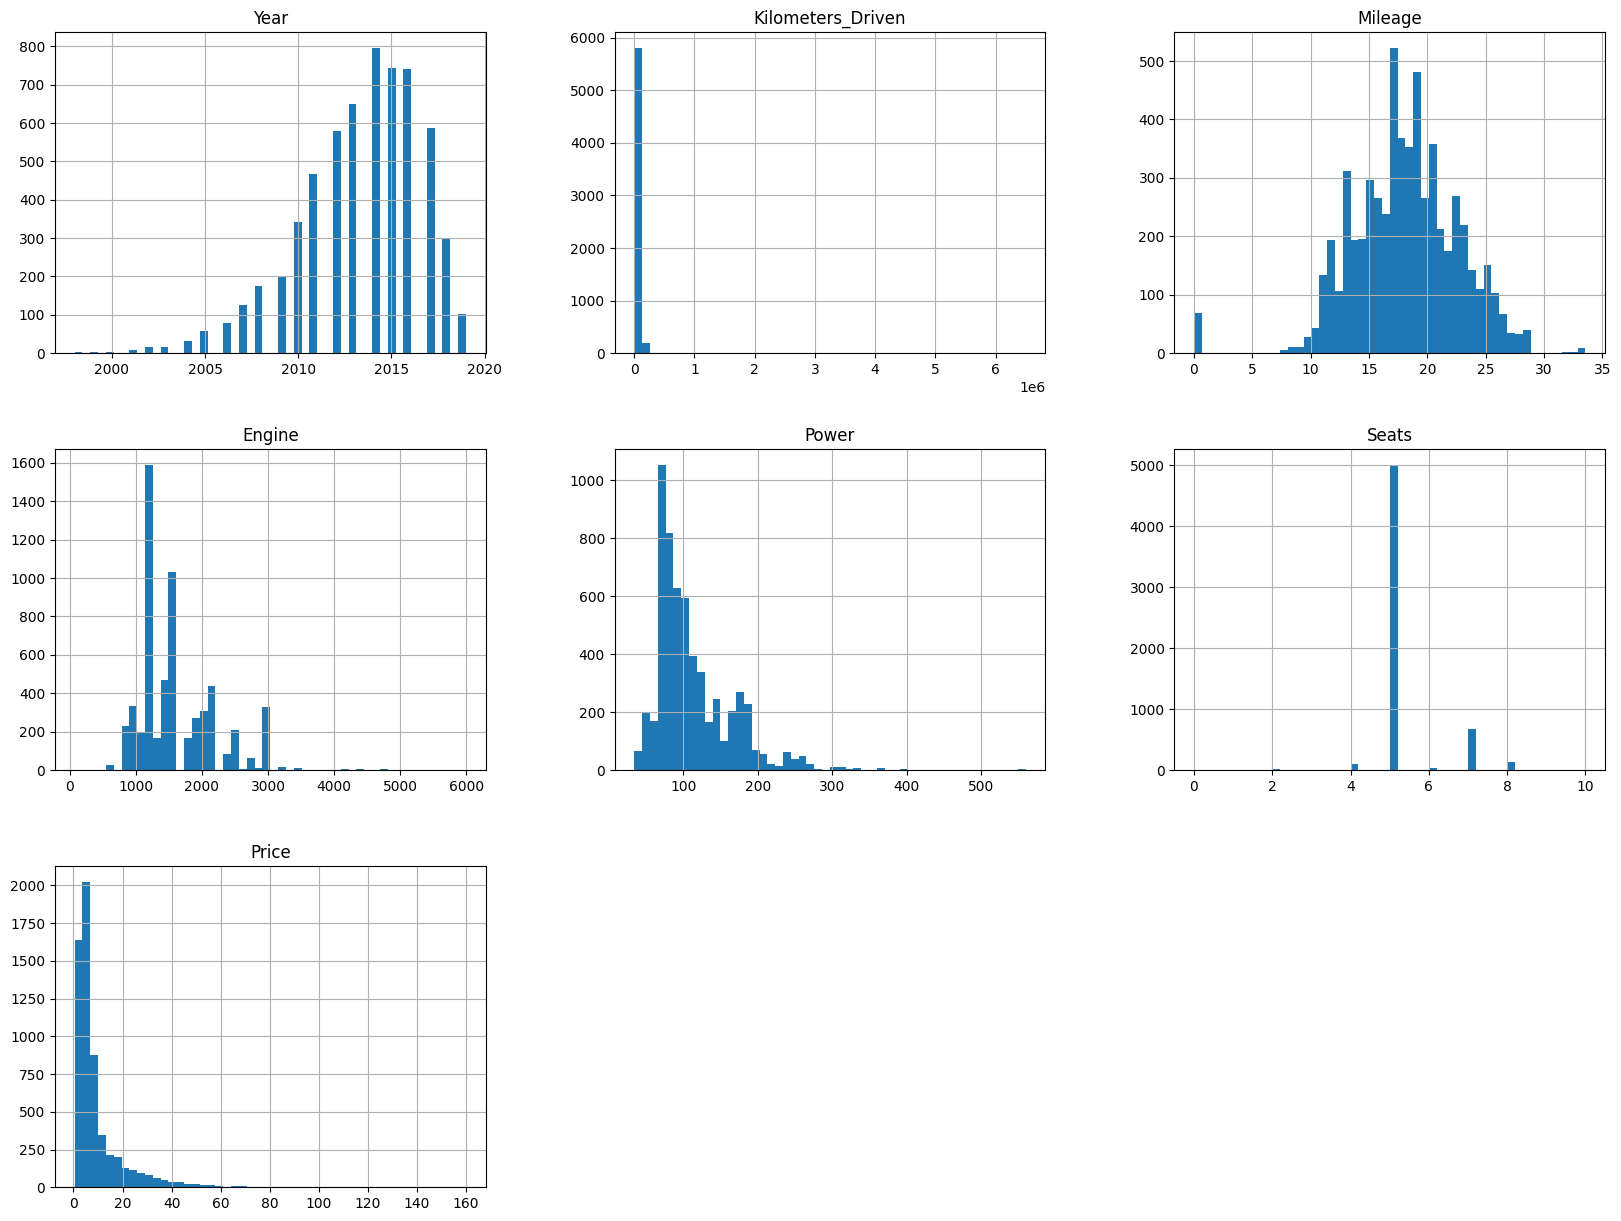

In [14]:
# histogram is plotted to see distribution of variables
df1=df.select_dtypes(include='number')
df1.hist(bins=50,figsize=(20,15))
plt.title('Distribution of Numerical columns');

In [15]:
df = df.drop(df[df['Fuel_Type'] == 'Electric'].index)
df.shape

(6017, 13)

In [16]:
# there are two units of mileage kmpl and km/kg
# for CNG multiplying factor is 0.557 and LPG is 0.667
df.Mileage[df['Fuel_Type']=='CNG']=df.Mileage[df['Fuel_Type']=='CNG']*0.557
df.Mileage[df['Fuel_Type']=='LPG']=df.Mileage[df['Fuel_Type']=='LPG']/1.5
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,14.8162,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,NaN,17.74


In [17]:
#imputing the null values with mean,nedian,mode as per requirement
df[df['Mileage']==0]
df1=df.drop(df[df['Mileage']==0].index,axis=0)

df['Mileage'].fillna(df1['Mileage'].mean(),inplace=True)
df['Engine'].fillna(df['Engine'].median(),inplace=True)
df['Power'].fillna(df['Power'].median(),inplace=True)
df['Seats'].fillna(df['Seats'].mode()[0],inplace=True)

In [18]:
# there were some rows with milege 0, so replaced them with mean
df.Mileage[df['Mileage']==0]=df1['Mileage'].mean()
df[df['Mileage']==0]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [19]:
# there were some rows with seats 0, so replaced them with mode
df.Seats[df['Seats']==0]=df['Seats'].mode()[0]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,14.8162,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,NaN,17.74


In [20]:
df['Mileage'] = df['Mileage'].astype(float)

In [21]:
df.Seats.value_counts()

5.0     5055
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

## 2. Univariate Analysis

In [22]:
#descriptive statistics of numeric columns
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6017.000000,6.017000e+03,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,2013.358152,5.874228e+04,18.225395,1620.737078,112.902114,5.277713,9.478340
std,3.269967,9.128375e+04,4.089102,599.398319,53.282014,0.803597,11.189605
min,1998.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.290000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,20.920000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,160.000000


**INFERENCE:** Kilometers_Driven ,Power ,Engine ,Price: these columns have outliers. we will remove outliers while performing univariate analysis.
Mileage and Seats: these columns have zeros in some rows.

In [23]:
#descriptive statistics of categorical columns
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,New_Price
count,6017,6017,6017,6017,6017,823
unique,1874,11,4,2,4,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,95.13 Lakh
freq,49,789,3205,4299,4927,6


In [24]:
df=df.drop('Name',axis=1)

 We can drop 'Name' column as it does not add information for prediction

In [25]:
#function to plot graphs
def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

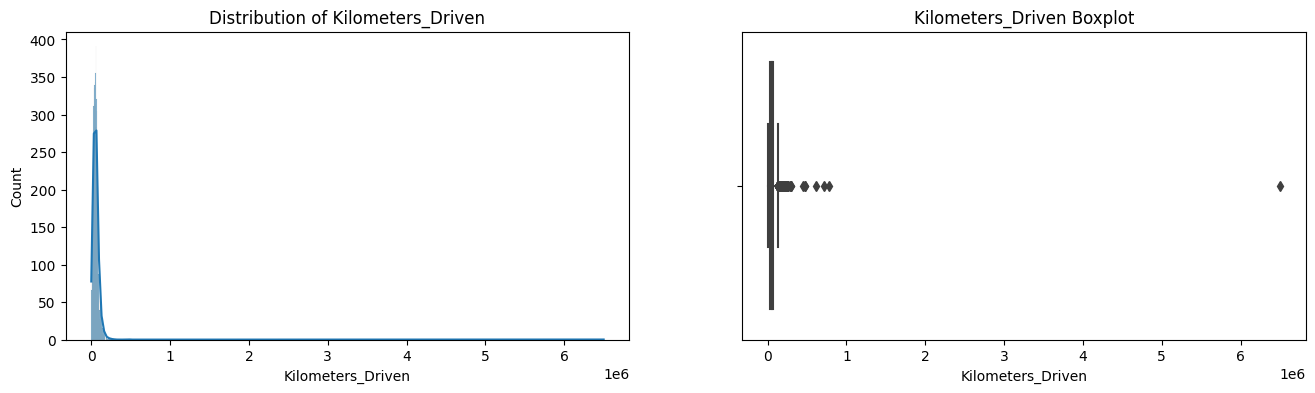

In [26]:
#distribution of kilometers driven
plot_num(df,'Kilometers_Driven')
#right skewed with median around 50000

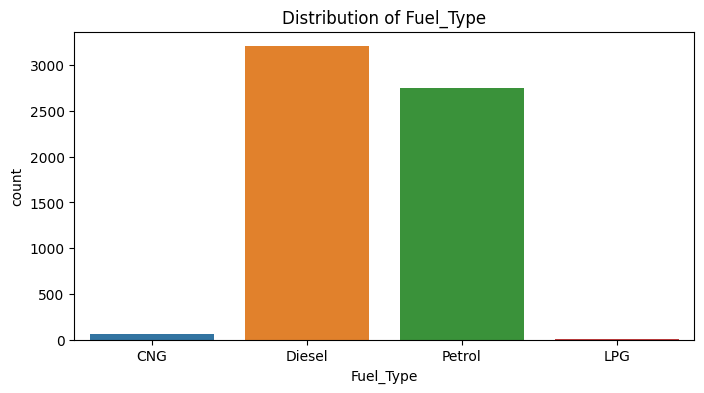

In [27]:
#count of fuel types
plt.figure(figsize=(8,4))
sns.countplot(df,x='Fuel_Type');
plt.title('Distribution of Fuel_Type');
#diesel and petrol type vehicle is highest

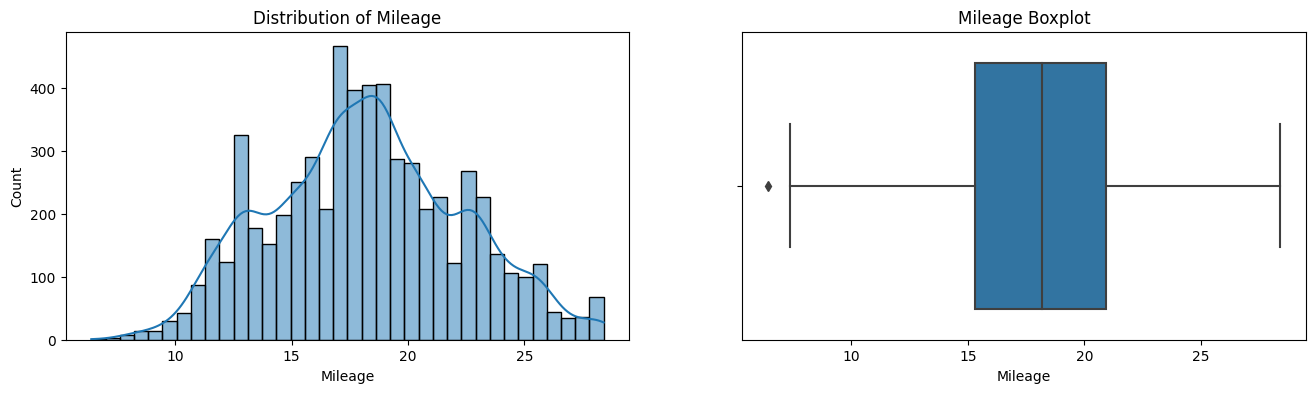

In [28]:
#distribution of Mileage
plot_num(df,'Mileage')
#normal distribution with few outliers

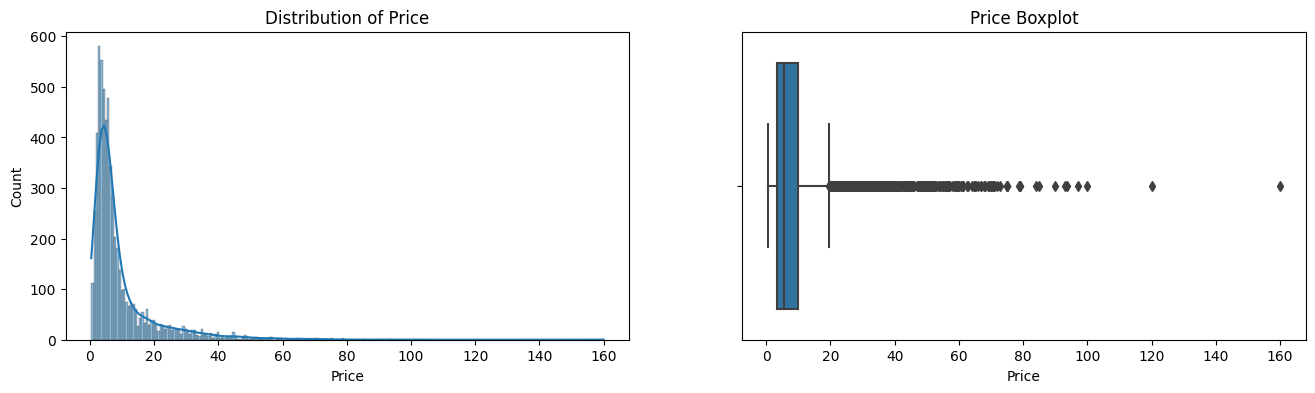

In [29]:
#spread of target column price.
plot_num(df,'Price')
#plots of outliers; some transformation may be required

## 3. Bivariate Analysis

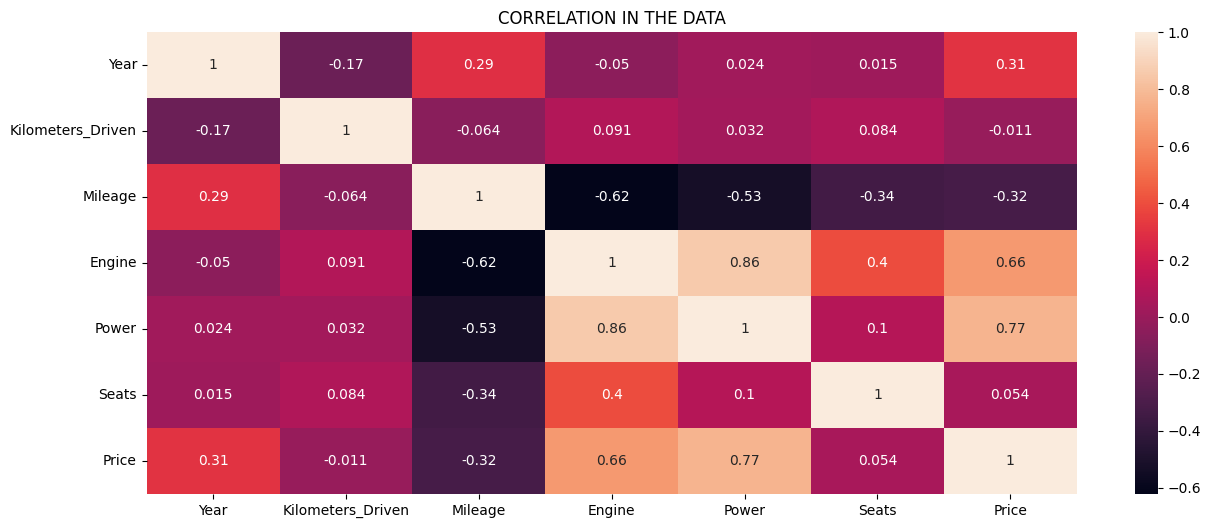

In [30]:
#checking correlation in the data
numeric_data = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,6))
sns.heatmap(numeric_data.corr(),annot=True, fmt='.2g')
plt.title('CORRELATION IN THE DATA');

**Inference:**  High correlation between power, engine and price.

In [31]:
#seeing the overall distribution and relationship of all columns
# sns.pairplot(df)

In [32]:
#preparing the data for modeling ahead.
df_num=df.select_dtypes(include='number')
df_num.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,14.8162,998.0,58.16,5.0,1.75
1,2015,41000,19.6700,1582.0,126.20,5.0,12.50
2,2011,46000,18.2000,1199.0,88.70,5.0,4.50
3,2012,87000,20.7700,1248.0,88.76,7.0,6.00
4,2013,40670,15.2000,1968.0,140.80,5.0,17.74


In [33]:
#counting and removing outliers

Q3 = df_num.quantile(0.75)
Q1 = df_num.quantile(0.25)
IQR = Q3 - Q1

# ~ represents NOT or Exclude such rows
df=df[~((df_num < (Q1 - 3 * IQR)) |(df_num > (Q3 + 3 * IQR))).any(axis=1)]
df.shape

(4776, 12)

In [34]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df, df.Price, random_state = 10, test_size = 0.2)

In [35]:
df.Mileage.isna().sum()

0

In [36]:
#scaling the numerical features for modelling ahead
feat_num1=X_train[['Kilometers_Driven','Mileage', 'Engine', 'Power', 'Seats']]
mmscaler1 = MinMaxScaler()
X1_train= pd.DataFrame(mmscaler1.fit_transform(feat_num1), columns=feat_num1.columns)
X1_train.head()
feat_num2=X_test[['Kilometers_Driven','Mileage', 'Engine', 'Power', 'Seats']]
mmscaler2 = MinMaxScaler()
X1_test= pd.DataFrame(mmscaler2.fit_transform(feat_num2), columns=feat_num2.columns)
X1_test.shape,X1_train.shape

((956, 5), (3820, 5))

In [37]:
feat_num1.isnull().sum()

Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [38]:
#encoding the categorical columns for modelling ahead
feat_cat1=X_train[['Location','Fuel_Type','Transmission','Owner_Type']]
OHE1 = OneHotEncoder()
X2_train=OHE1.fit_transform(feat_cat1)
X2_train= pd.DataFrame(OHE1.fit_transform(feat_cat1).toarray(), columns=OHE1.get_feature_names_out())
X2_train.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [39]:
#encoding the categorical columns for modelling ahead
feat_cat2=X_test[['Location','Fuel_Type','Transmission','Owner_Type']]
OHE2 = OneHotEncoder()
X2_test=OHE2.fit_transform(feat_cat2)
X2_test= pd.DataFrame(OHE2.fit_transform(feat_cat2).toarray(), columns=OHE2.get_feature_names_out())
X2_test.shape,X2_train.shape

((956, 21), (3820, 21))

In [40]:
#joining the numerical and categorical data 
X_train=pd.concat([X1_train,X2_train],axis=1)
X_train.shape

(3820, 26)

In [41]:
X_test=pd.concat([X1_test,X2_test],axis=1)
X_test.shape

(956, 26)

In [42]:
#defining y
y=df['Price']

In [43]:
#name of columns
df.columns
df=df.dropna()

## 5. KNN Regression:

In [44]:
#fitting the model
RMSE_Train=[]
RMSE_Test=[]
MAPE_Train=[]
MAPE_Test=[]
k=[]
for i in range(1,20):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    #predicting the train data
    train_preds = knn_reg.predict(X_train)
    #calculating the train performance
    mse = mean_squared_error(y_train, train_preds)
    knn_rmse_train = sqrt(mse)
    knn_mape_train=np.mean(abs(y_train - train_preds)/y_train)*100
    test_preds = knn_reg.predict(X_test)
    
    #calculating the test performance
    mse = mean_squared_error(y_test, test_preds)
    knn_rmse_test = sqrt(mse)
    knn_mape_test=np.mean(abs(y_test - test_preds)/y_test)*100
    RMSE_Train.append(knn_rmse_train)
    RMSE_Test.append(knn_rmse_test)
    MAPE_Train.append(knn_mape_train)
    MAPE_Test.append(knn_mape_test)
    k.append(i)

knn_res=pd.DataFrame({'k':k,'RMSE Train':RMSE_Train,'RMSE Test':RMSE_Test,' MAPE Train':MAPE_Train,'MAPE Test':MAPE_Test})
knn_res

# balance of evaluation matrix with consistency in train and test is achieved at k=7

,k,RMSE Train,RMSE Test,MAPE Train,MAPE Test
0,1,0.079640,3.571149,0.064283,39.488878
1,2,1.702451,3.189231,17.303926,36.608594
2,3,2.045834,3.103503,22.013632,36.735503
3,4,2.236788,3.127520,24.664432,36.574490
4,5,2.378514,3.140907,26.496259,37.070908
5,6,2.474256,3.096721,27.961587,37.280795
6,7,2.541206,3.112675,29.225366,37.531777
7,8,2.598750,3.127786,30.263750,37.580543
8,9,2.637689,3.131686,30.974986,37.723693
9,10,2.684713,3.117992,31.676766,37.606433


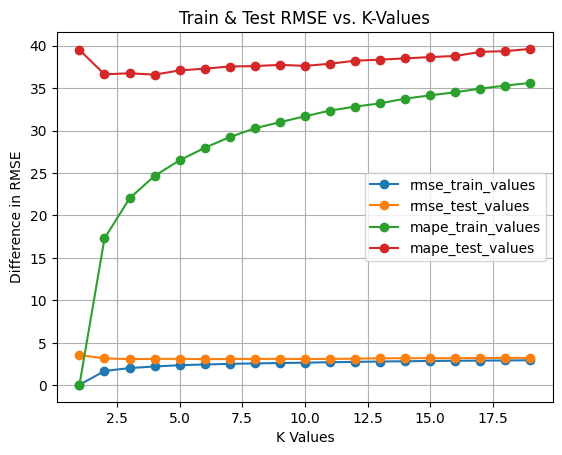

In [45]:
# plt.plot(k, rmse_diff_values, marker='o',label='rmse_diff_values')
plt.plot(k, RMSE_Train, marker='o',label='rmse_train_values')
plt.plot(k,RMSE_Test , marker='o',label='rmse_test_values')
plt.plot(k,MAPE_Train , marker='o',label='mape_train_values')
plt.plot(k,MAPE_Test , marker='o',label='mape_test_values')

plt.xlabel('K Values')
plt.ylabel('Difference in RMSE')
plt.title('Train & Test RMSE vs. K-Values')
plt.legend()
plt.grid(True)
plt.show();

In [46]:
#summarising
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors'],
                       'Train_RMSE':2.541206,
                       'Test_RMSE':3.112675,
                        'Train_MAPE':29.225366,
                        'Test_MAPE':37.531777,
                        'R Sq':['NA']})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,2.541206,3.112675,29.225366,37.531777,NA


## 6.Decision Tree

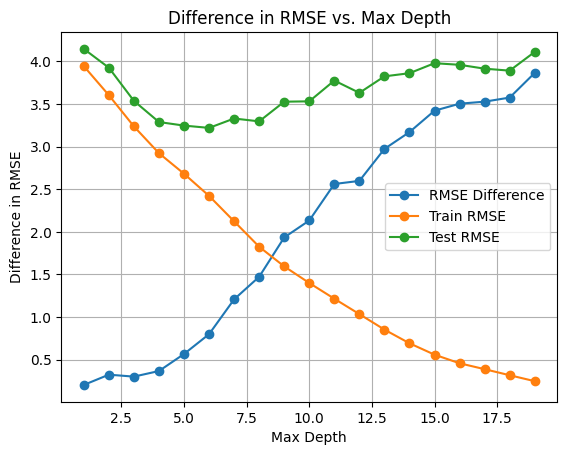

,depth,RMSE Train,RMSE Test,MAPE train,MAPE test
0,1,3.944321,4.146720,63.754260,67.605168
1,2,3.603153,3.925978,56.855993,64.093657
2,3,3.236838,3.536677,47.604224,59.406248
3,4,2.922607,3.288310,41.879297,54.598183
4,5,2.681198,3.246656,37.083990,49.551696
5,6,2.421331,3.219677,33.475477,46.294529
6,7,2.122768,3.329915,29.276578,44.260478
7,8,1.824238,3.296271,24.866844,41.889675
8,9,1.593683,3.527235,21.228750,43.917552
9,10,1.398860,3.531478,17.797967,42.228055


In [47]:
#loop to find best Max_depth value at which train-test rmse is lowest.
max_depth_values = []
rmse_diff_values = []
rmse_test_values = []
rmse_train_values = []
mape_train=[]
mape_test=[]

# Loop over different max_depth values
for max_depth in range(1, 20):
    # Create and fit the decision tree regressor
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    regressor.fit(X_train, y_train)
    
    # Predict on train and test data
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Calculate RMSE for train and test data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Calculate difference in RMSE
    rmse_diff = rmse_test - rmse_train
    
    # calculating MAPE
    mse = mean_squared_error(y_train, y_train_pred)
    dt_rmse_train = sqrt(mse)
    dt_mape_train=np.mean(abs(y_train - y_train_pred)/y_train)*100
    mse2 = mean_squared_error(y_test, y_test)
    dt_rmse_test = sqrt(mse2)
    dt_mape_test=np.mean(abs(y_test - y_test_pred)/y_test)*100
    # Append values to the lists
    max_depth_values.append(max_depth)
    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)
    rmse_diff_values.append(rmse_diff)
    mape_train.append(dt_mape_train)
    mape_test.append(dt_mape_test)
    
# Plot the graph
plt.plot(max_depth_values, rmse_diff_values, marker='o',label='RMSE Difference')
plt.plot(max_depth_values, rmse_train_values, marker='o',label='Train RMSE')
plt.plot(max_depth_values, rmse_test_values, marker='o',label='Test RMSE')
plt.xlabel('Max Depth')
plt.ylabel('Difference in RMSE')
plt.title('Difference in RMSE vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()
dt_res=pd.DataFrame({'depth':max_depth_values,'RMSE Train':rmse_train_values,'RMSE Test':rmse_test_values,'MAPE train':mape_train,'MAPE test':mape_test})
dt_res


In [48]:
# taking max depth for balance of evaluation matrix and less gap in train and test performance will be 6
dt_RMSE_train=2.421331
dt_RMSE_test=3.219677
dt_MAPE_train=33.475477
dt_MAPE_test=46.294529

In [49]:
dtr = DecisionTreeRegressor(max_depth=6,random_state=0)
model = dtr.fit(X_train,y_train)
#feature importance
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,Kilometers_Driven,0.077571
1,Mileage,0.032557
2,Engine,0.636684
3,Power,0.171938
4,Seats,0.000000
5,Location_Ahmedabad,0.000661
6,Location_Bangalore,0.000000
7,Location_Chennai,0.000000
8,Location_Coimbatore,0.006069
9,Location_Delhi,0.000000


In [50]:
#summarising!
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors','Decision_Tree'],
                       'Train_RMSE':[knn_rmse_train,dt_RMSE_train],
                       'Test_RMSE':[knn_rmse_test,dt_RMSE_test],
                        'Train_MAPE':[knn_mape_train,dt_MAPE_train],
                        'Test_MAPE':[knn_mape_test,dt_MAPE_test],
                        'R Sq':['NA','NA']})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,2.967518,3.242319,35.601149,39.600560,NA
1,Decision_Tree,2.421331,3.219677,33.475477,46.294529,NA


# 7.Linear Regression

In [51]:
#fitting the data
lm = LinearRegression()
lr = lm.fit(X_train,y_train)
R2=lr.score(X_train,y_train)
R2

0.7145970319551754

In [52]:
#coefficients and intercept
lr.intercept_, lr.coef_

(4.461666229677469,
 array([-8.87220802e+00, -4.07652158e-01, -5.63093959e+00,  2.56312676e+01,
        -1.46549439e-14, -3.19285125e-01,  8.57694156e-01, -5.44588018e-03,
         1.43387500e+00, -2.26007416e-01,  4.38571548e-01,  6.55514232e-02,
         6.63273739e-01, -2.01320875e+00, -8.26034476e-01, -6.89842216e-02,
         2.36806656e-01,  1.73415589e+00, -6.03585742e-01, -1.36737680e+00,
         1.48150678e+00, -1.48150678e+00,  8.85147075e-01,  1.38903006e-02,
        -2.83585627e-02, -8.70678812e-01]))

In [53]:
#predicting
yhat_train = lr.predict(X_train)
yhat_test = lr.predict(X_test)

In [56]:
#RMSE of train and test
lr_RMSE_train = np.sqrt(sum((y_train-yhat_train)**2)/y_train.shape[0])
lr_RMSE_test = np.sqrt(sum((y_test-yhat_test)**2)/y_test.shape[0])
lr_RMSE_train, lr_RMSE_test

(2.9777012975139465, 3.2178707146488867)

In [57]:
#MAPE of train and test
lr_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
lr_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)
lr_MAPE_train,lr_MAPE_test

(41.508139623713795, 45.46095707588019)

In [58]:
#summarising
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors','Decision_Tree','Linear_Regression'],
                       'Train_RMSE':[knn_rmse_train,dt_RMSE_train,lr_RMSE_train],
                       'Test_RMSE':[knn_rmse_test,dt_RMSE_test,lr_RMSE_test],
                        'Train_MAPE':[knn_mape_train,dt_MAPE_train,lr_MAPE_train],
                        'Test_MAPE':[knn_mape_test,dt_MAPE_test,lr_MAPE_test],
                        'R Sq':['NA','NA',R2]})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,2.967518,3.242319,35.601149,39.600560,NA
1,Decision_Tree,2.421331,3.219677,33.475477,46.294529,NA
2,Linear_Regression,2.977701,3.217871,41.508140,45.460957,0.714597


In [59]:
# Calculate the absolute values of coefficients
coefficients=lr.coef_
absolute_coefficients = np.abs(coefficients)

# Calculate the feature importance as the percentage of contribution
feature_names = [ 'Location', 'Kilometers_Driven', 'Fuel_Type','Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
feature_importance = (absolute_coefficients / np.sum(absolute_coefficients)) * 100

# Print the feature importance
for feature_name, importance in zip(feature_names, feature_importance):
    print(f"{feature_name}: {importance}%")

Location: 15.797243810282685%
Kilometers_Driven: 0.7258374136491954%
Fuel_Type: 10.026064022062814%
Transmission: 45.63727348233185%
Owner_Type: 2.6093585907497054e-14%
Mileage: 0.568497149598649%
Engine: 1.527151264161551%
Power: 0.009696559954387335%
Seats: 2.553059282090996%


In [60]:
feature_importance

array([1.57972438e+01, 7.25837414e-01, 1.00260640e+01, 4.56372735e+01,
       2.60935859e-14, 5.68497150e-01, 1.52715126e+00, 9.69655995e-03,
       2.55305928e+00, 4.02413272e-01, 7.80890356e-01, 1.16716359e-01,
       1.18097963e+00, 3.58458113e+00, 1.47078021e+00, 1.22828564e-01,
       4.21641656e-01, 3.08771879e+00, 1.07470329e+00, 2.43465716e+00,
       2.63786914e+00, 2.63786914e+00, 1.57603204e+00, 2.47321145e-02,
       5.04933076e-02, 1.55027085e+00])

## 8. Improvement Step: Linear model with transformation on target column

In [61]:
y_train1=np.log(y_train)
y_test1=np.log(y_test)
y_train1.isna().sum()
y_train.isna().sum()

0

In [62]:
#fitting the data
lm = LinearRegression()
lr = lm.fit(X_train,y_train1)
R2=lr.score(X_train,y_train1)
R2

0.7477565761923889

In [63]:
#predicting
yhat_train = lr.predict(X_train)
yhat_test = lr.predict(X_test)

In [64]:
yhat_train = np.exp(yhat_train)
yhat_test = np.exp(yhat_test)

In [65]:
#RMSE of train and test
lr_rmse_train = np.sqrt(mean_squared_error(y_train1, yhat_train))
lr_rmse_test = np.sqrt(mean_squared_error(y_test1, yhat_test))
lr_rmse_train, lr_rmse_test

(6.750186289110335, 8.640229565730642)

In [66]:
X=pd.concat([X_train,X_test],axis=0)
X.shape
# df.shape
len(y)
y_train1=np.log(y_train)
y_test1=np.log(y_test)
len(y_test1)
y=pd.concat([y_train1,y_test1],axis=0)

In [67]:
feature_names = X_train.columns

In [68]:
# Create the linear regression model
from mlxtend.feature_selection import SequentialFeatureSelector
model = LinearRegression()

# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(estimator=model, k_features='best', forward=True, verbose=2, scoring='r2')

# Perform feature selection
sfs.fit(X, y)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs.transform(X)
X_test_selected = sfs.transform(X)

# Train a linear regression model on the selected features
model.fit(X_train_selected, y)

# Evaluate the model on the testing data
score = model.score(X_test_selected, y)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)
print("Model Score:", score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.4s finished

[2023-06-27 23:26:47] Features: 1/26 -- score: 0.4534977303334742[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished

[2023-06-27 23:26:47] Features: 2/26 -- score: 0.5433488479686707[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished

[2023-06-27 23:26:48] Features: 3/26 -- score: 0.6335849311251425[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Selected Features: ['Kilometers_Driven', 'Mileage', 'Power', 'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Hyderabad', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Third']
Model Score: 0.7415303893986342


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-06-27 23:26:58] Features: 25/26 -- score: 0.7366809328722481[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-06-27 23:26:58] Features: 26/26 -- score: 0.7371688106120012

**INFERENCE:**
1. So, features like Location, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type,Mileage,Power are important.
2. Using Log-transform on target column improved performance, R2 score increased from 71% to 75% .
3. Factors that could have been like 'engine' important actually proved to be insignificant, due to high correlation with power feature.


In [71]:
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,2.967518,3.242319,35.601149,39.600560,NA
1,Decision_Tree,2.421331,3.219677,33.475477,46.294529,NA
2,Linear_Regression,2.977701,3.217871,41.508140,45.460957,0.714597


# CONCLUSION:

Based on the provided model evaluation results, we can draw the following conclusions for the given models:

1. K-Nearest Neighbors:
   - Train_RMSE:2.967518 	
   - Test_RMSE: 3.242319
   - Train_MAPE: 35.601149
   - Test_MAPE: 39.600560	

   The K-Nearest Neighbors model achieved relatively low RMSE values for both the training and testing datasets, indicating good predictive performance. The MAPE values are also moderate, suggesting that the model's predictions are generally close to the actual values. 
   
2. Decision Tree:
   - Train_RMSE: 2.421331	
   - Test_RMSE: 3.219677
   - Train_MAPE: 33.475477
   - Test_MAPE: 46.294529
				
   The Decision Tree model produced higher RMSE values compared to the K-Nearest Neighbors model, indicating a larger prediction error. The MAPE values are also relatively high, suggesting that the model's predictions have larger percentage errors.

3. Linear Regression:
   - Train_RMSE: 2.977701
   - Test_RMSE: 3.410473	
   - Train_MAPE: 41.508140
   - Test_MAPE: 41.508140
   - R-squared: 0.714597
   
   The Linear Regression model achieved moderate RMSE values for both the training and testing datasets. The MAPE values are also reasonable, indicating that the model's predictions are relatively close to the actual values. The R-squared value of 0.7145 suggests that approximately 71.45% of the variance in the target variable can be explained by the model, indicating a moderate level of fit.

In conclusion, among the evaluated models, the **Linear Regression** model appears to have the best performance based on the lower RMSE and MAPE values. Linear model after log transformation on target gave better explaination of variation when R2 increased to **75%**.